# Advanced House Prices


## Contents
* Data Cleaning
* Data Understanding and EDA
* Hypothesis Tests

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(font_scale=1.3)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

Before anything, let's fix None in MasVnrType feature

In [5]:
data['MasVnrType'] = data['MasVnrType'].apply(lambda x: np.nan if x == 'None' else x)

Null values 

In [6]:
nulls = data.isna().sum()

Null values percentage per column

In [7]:
(nulls[nulls != 0] / len(data) * 100).sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

More than 50% NaN values

In [8]:
nulls[nulls / len(data) * 100 > 50]

Alley          1369
MasVnrType      872
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

We remove the above features and Id as well

In [9]:
data.drop(['MiscFeature','PoolQC','Fence','Alley', 'MasVnrType', 'Id'], axis=1, inplace=True)

In [10]:
data.shape

(1460, 75)

Extracting numerical features and categorical features

In [11]:
num_df = data.select_dtypes(include=['number'])
num_cols = num_df.columns
len(num_cols)

37

In [12]:
cat_df = data.select_dtypes(include=['object'])
cat_cols = cat_df.columns
len(cat_cols)

38

Describing numerical features.

Here we include mode, median and trim_mean to remove 1% from head and tail

In [13]:
df_describe = num_df.describe()
df_describe.loc['median'] = num_df.median()
df_describe.loc['mode'] = num_df.mode().iloc[0]
df_describe.loc['trim_mean'] = stats.trim_mean(num_df, proportiontocut=0.1)
df_describe.T

,count,mean,std,min,25%,50%,75%,max,median,mode,trim_mean
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,50.0,20.0,49.152397
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,69.0,60.0,NaN
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,9478.5,7200.0,9563.284247
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,6.0,5.0,6.079623
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,5.0,5.0,5.477740
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,1973.0,2006.0,1974.126712
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,1994.0,1950.0,1986.369007
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,0.0,0.0,64.845890
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,383.5,0.0,386.076199
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,0.0,0.0,1.382705


Mean vs trim mean vs median

In [14]:
df_describe.T[['mean', 'trim_mean', 'median']]

,mean,trim_mean,median
MSSubClass,56.897260,49.152397,50.0
LotFrontage,70.049958,NaN,69.0
LotArea,10516.828082,9563.284247,9478.5
OverallQual,6.099315,6.079623,6.0
OverallCond,5.575342,5.477740,5.0
YearBuilt,1971.267808,1974.126712,1973.0
YearRemodAdd,1984.865753,1986.369007,1994.0
MasVnrArea,103.685262,64.845890,0.0
BsmtFinSF1,443.639726,386.076199,383.5
BsmtFinSF2,46.549315,1.382705,0.0


Filling null values
* Median for numerical features
* Mode for categorical features

In [15]:
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())
    num_df[col] = num_df[col].fillna(num_df[col].median())
    
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [16]:
data.isna().sum().sum()

0

## Data Understanding and EDA

Numerical features

In [17]:
num_df.shape

(1460, 37)

In [18]:
def box_plot(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        columnDf.plot.box()
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i + 1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [19]:
def eda(start, end):
    num_df[num_cols[start:end]].hist(figsize=(12, 8), layout=(2, 4))
    box_plot(num_df[num_cols[start:end]], 8, 4)
    plt.show()
    
    print()
    print('Unique values')
    for col in num_cols[start:end]:
        print(col, ':', num_df[col].nunique())

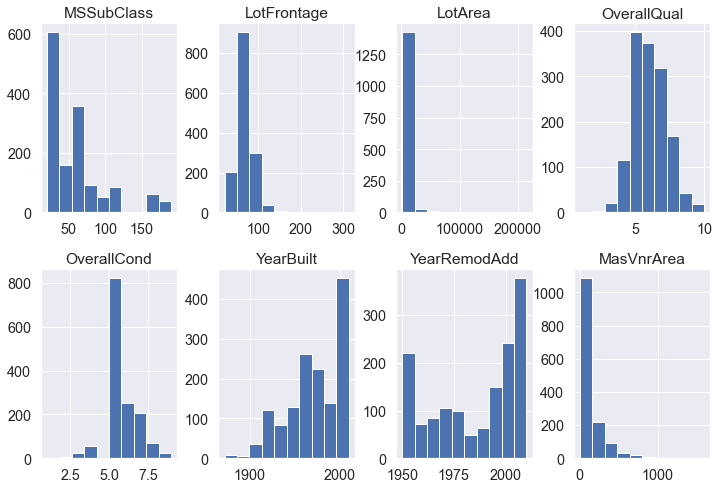

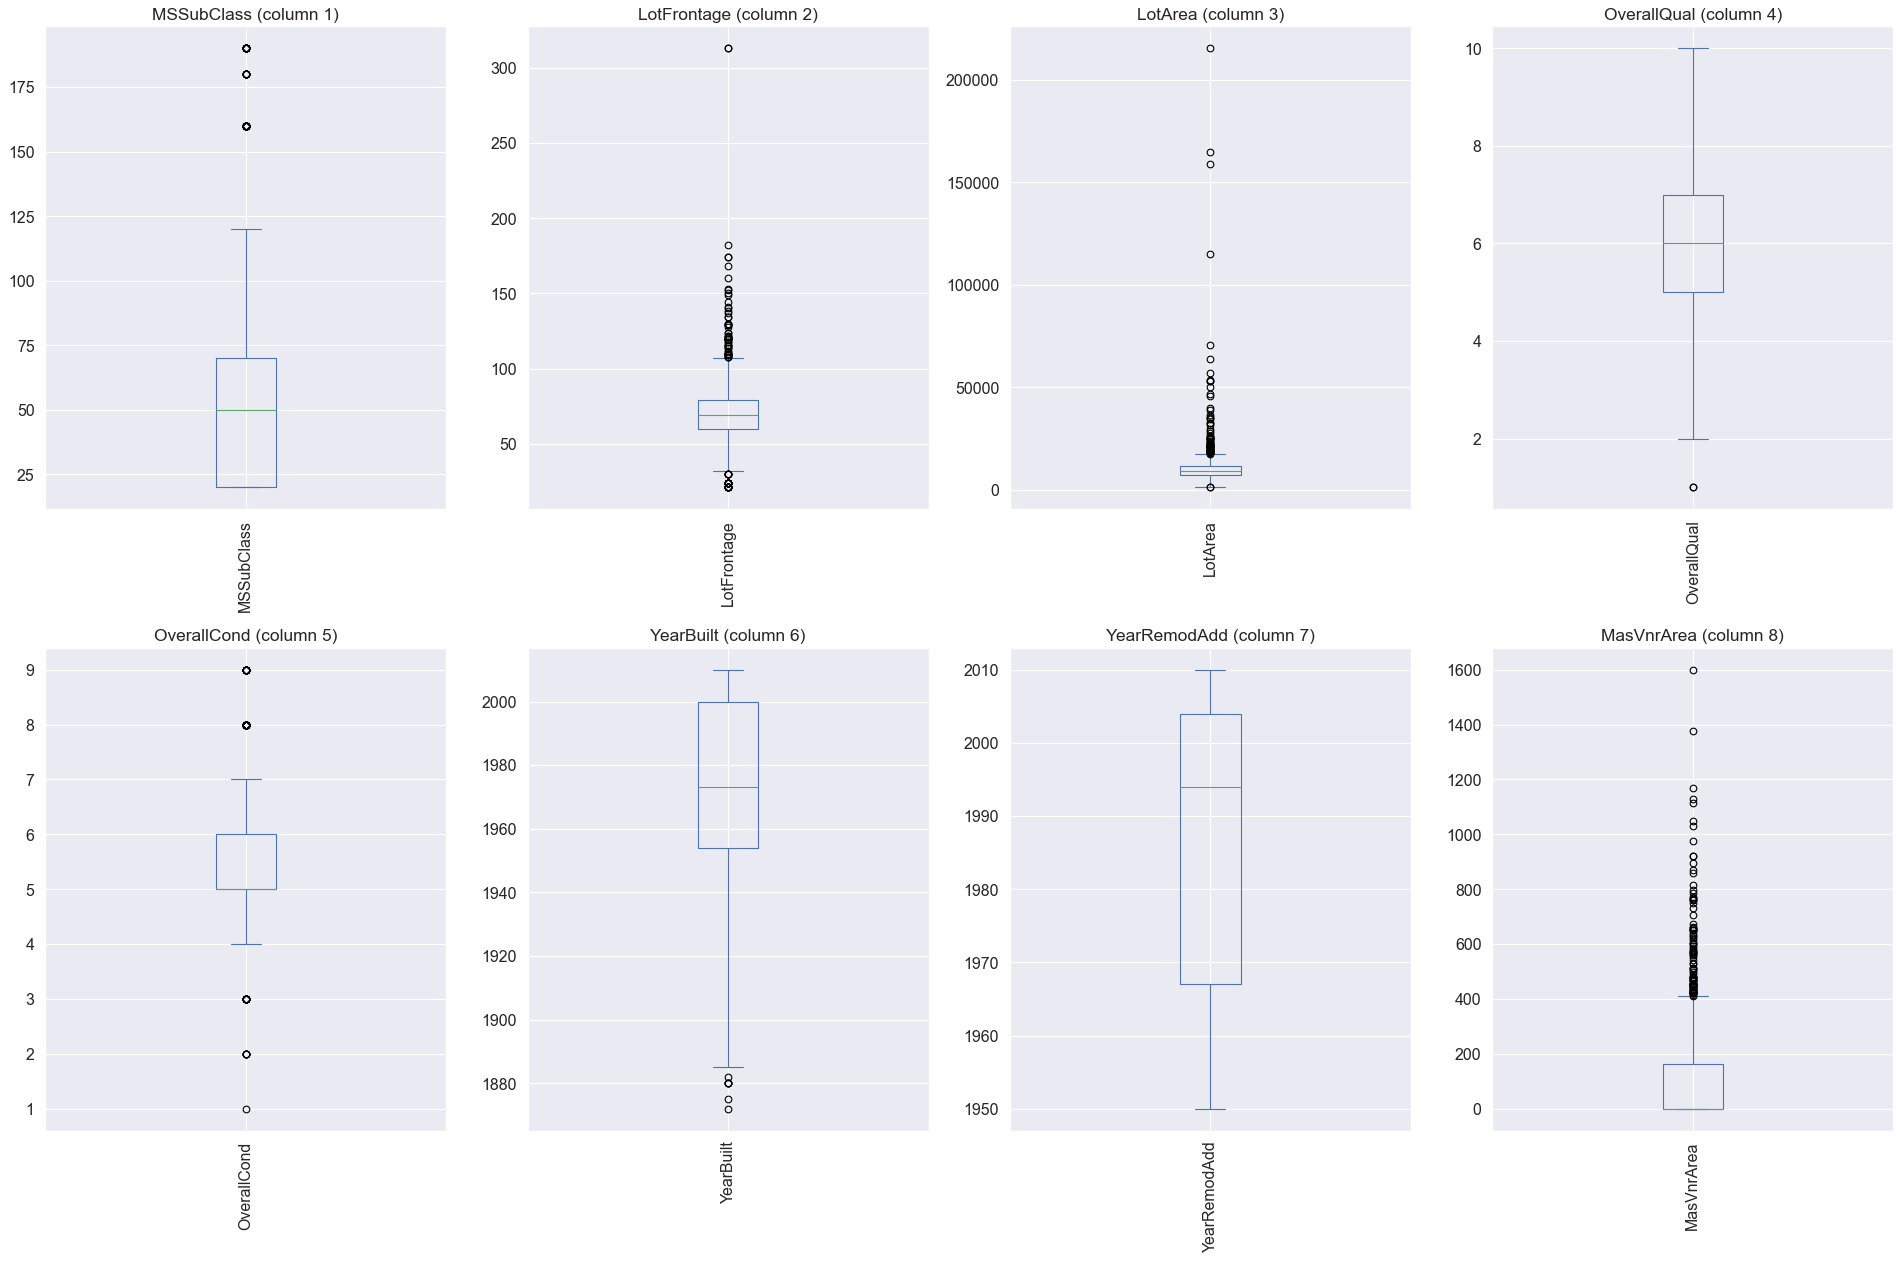


Unique values
MSSubClass : 15
LotFrontage : 110
LotArea : 1073
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
MasVnrArea : 327


In [20]:
eda(0, 8)

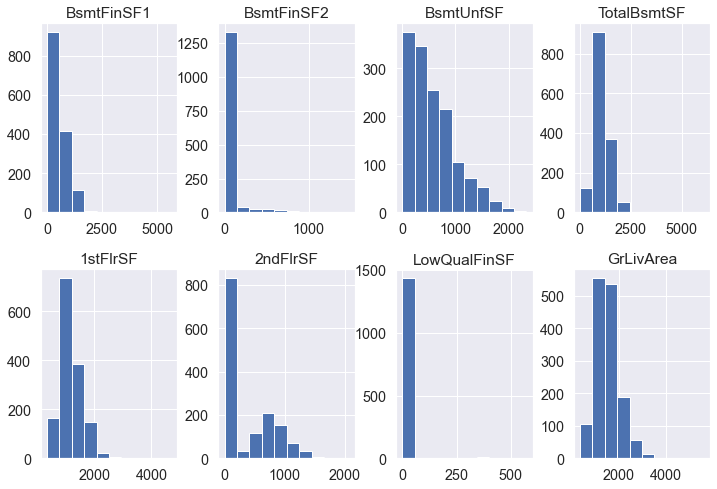

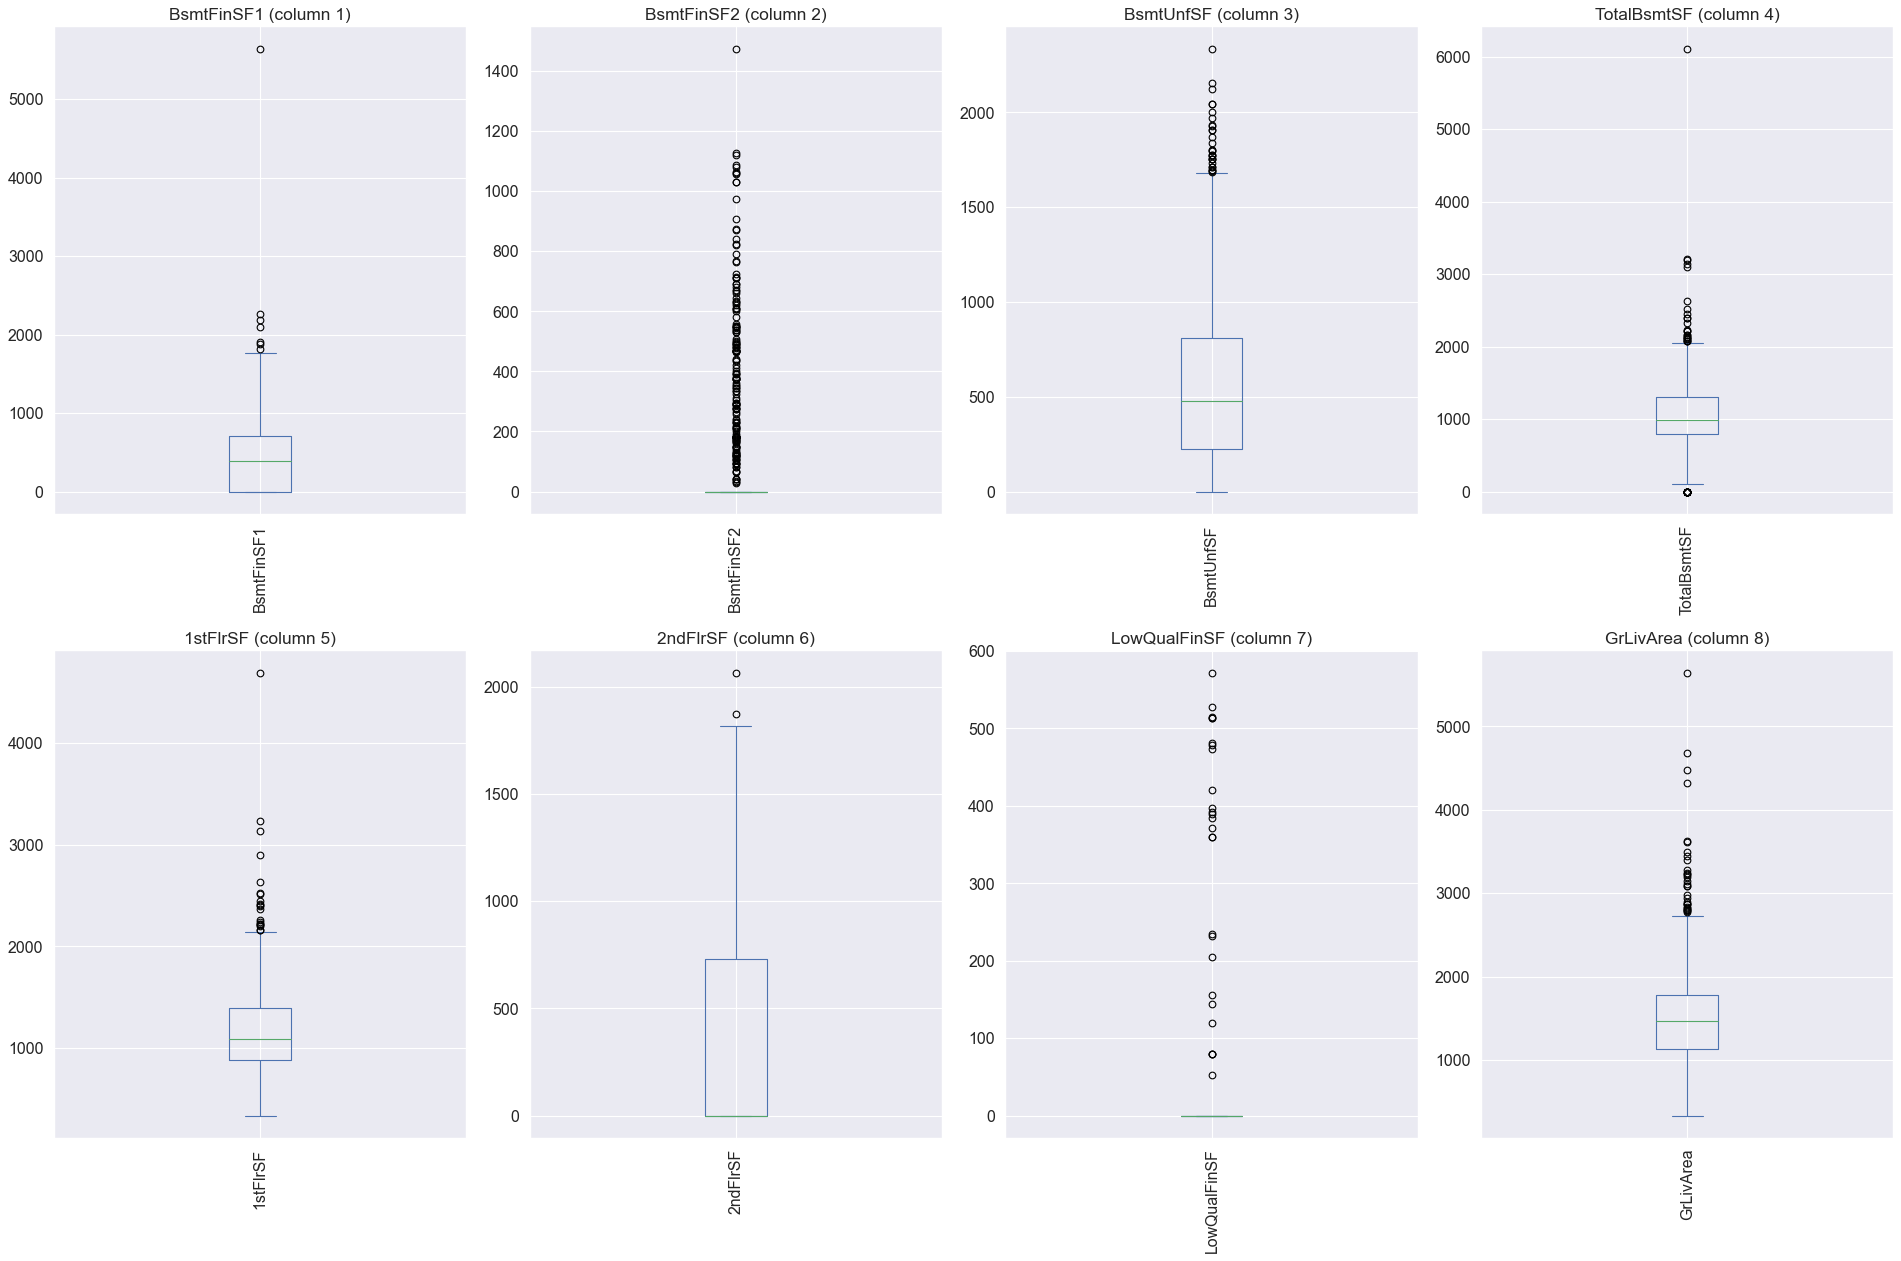


Unique values
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861


In [21]:
eda(8, 16)

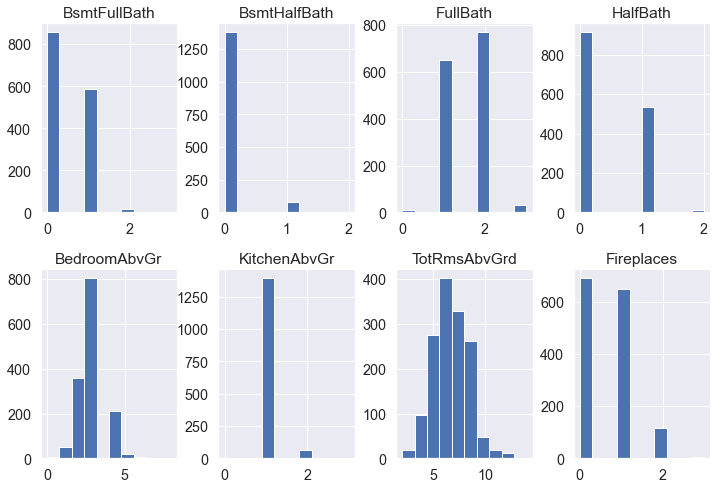

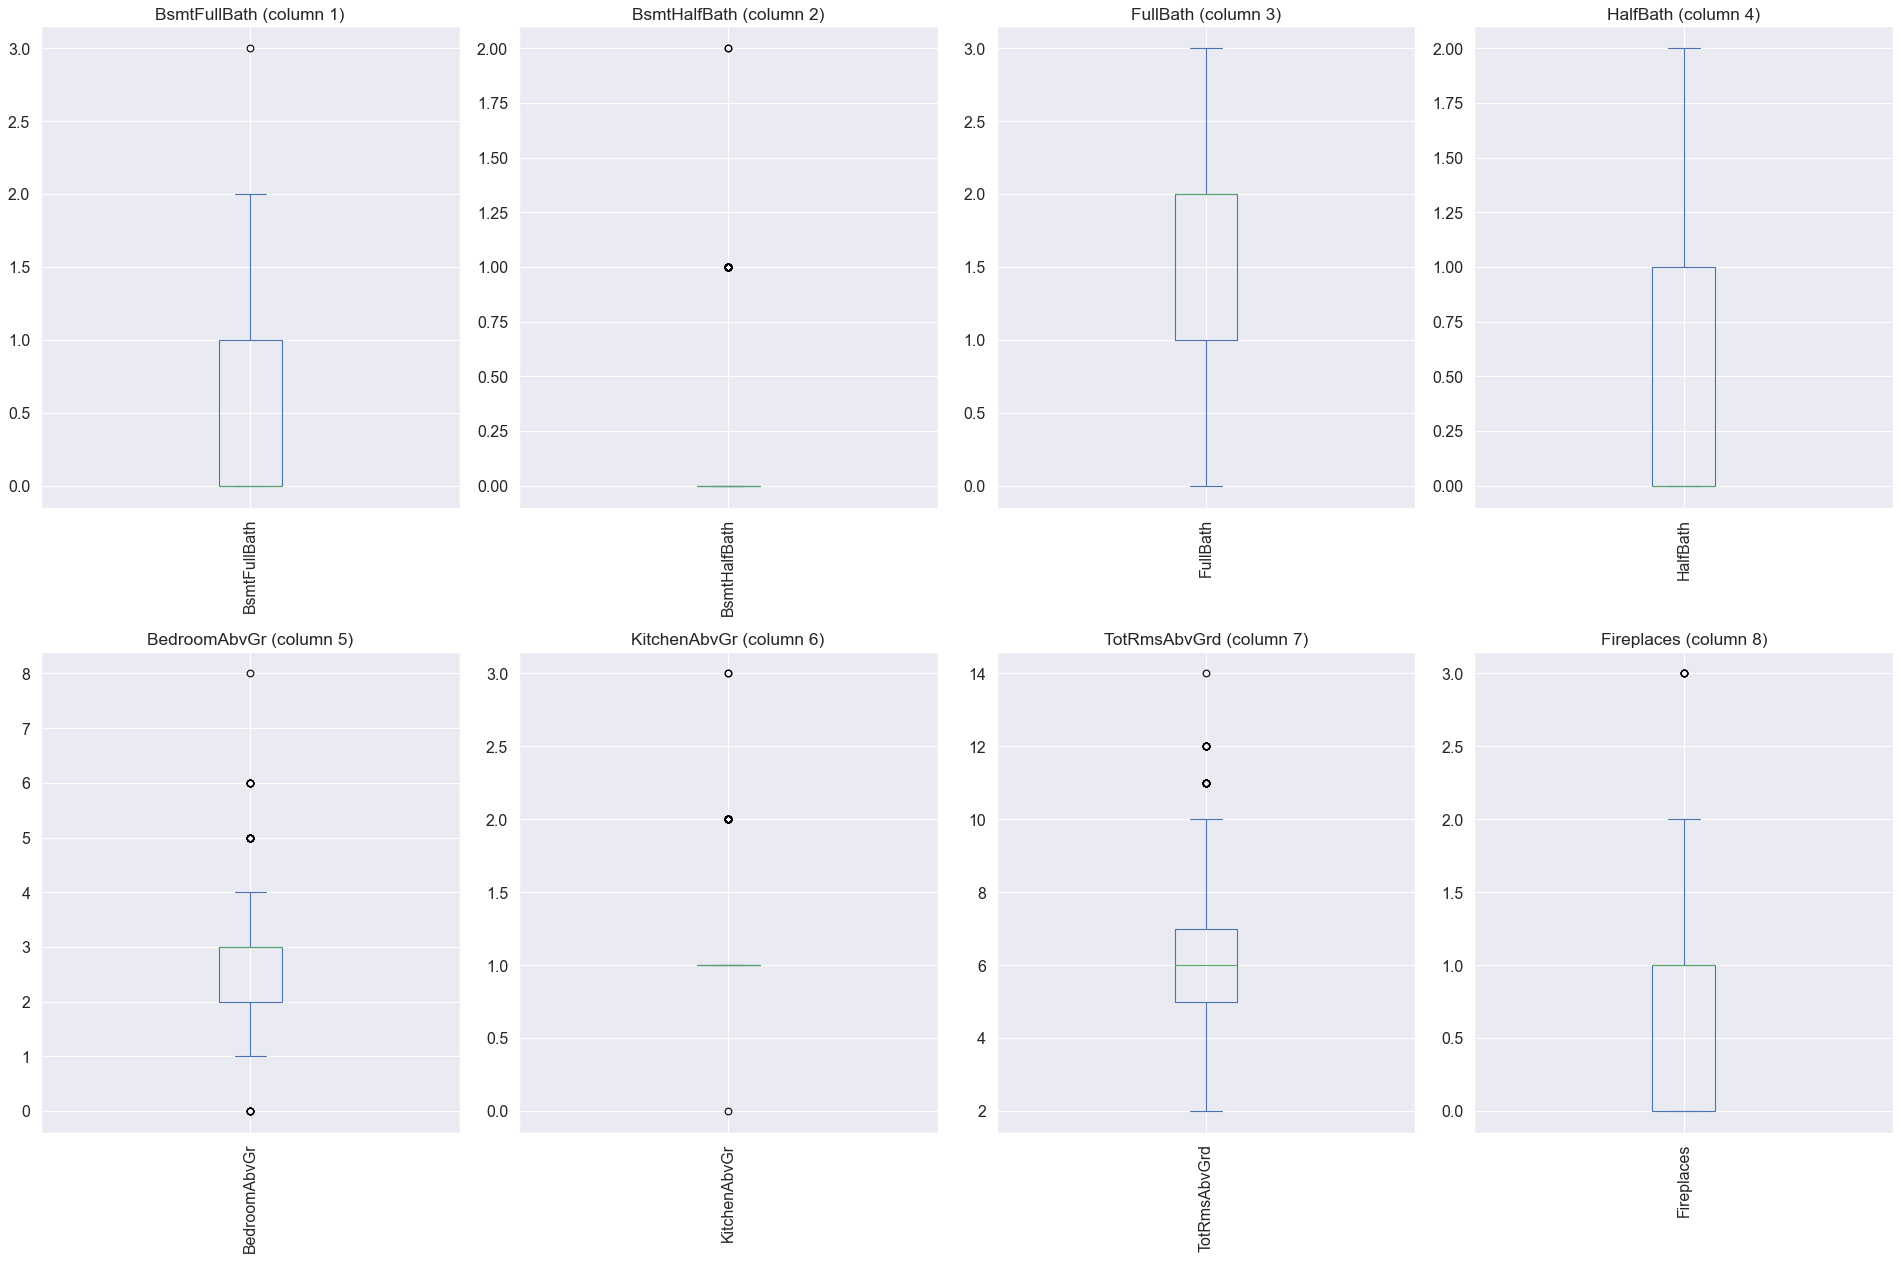


Unique values
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
TotRmsAbvGrd : 12
Fireplaces : 4


In [22]:
eda(16, 24)

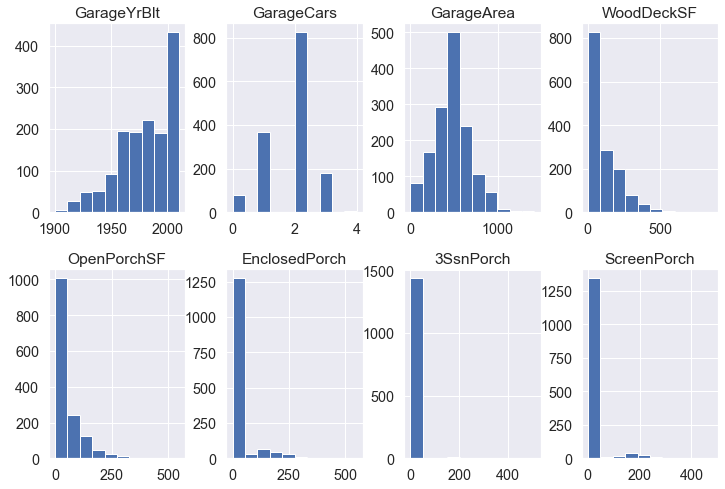

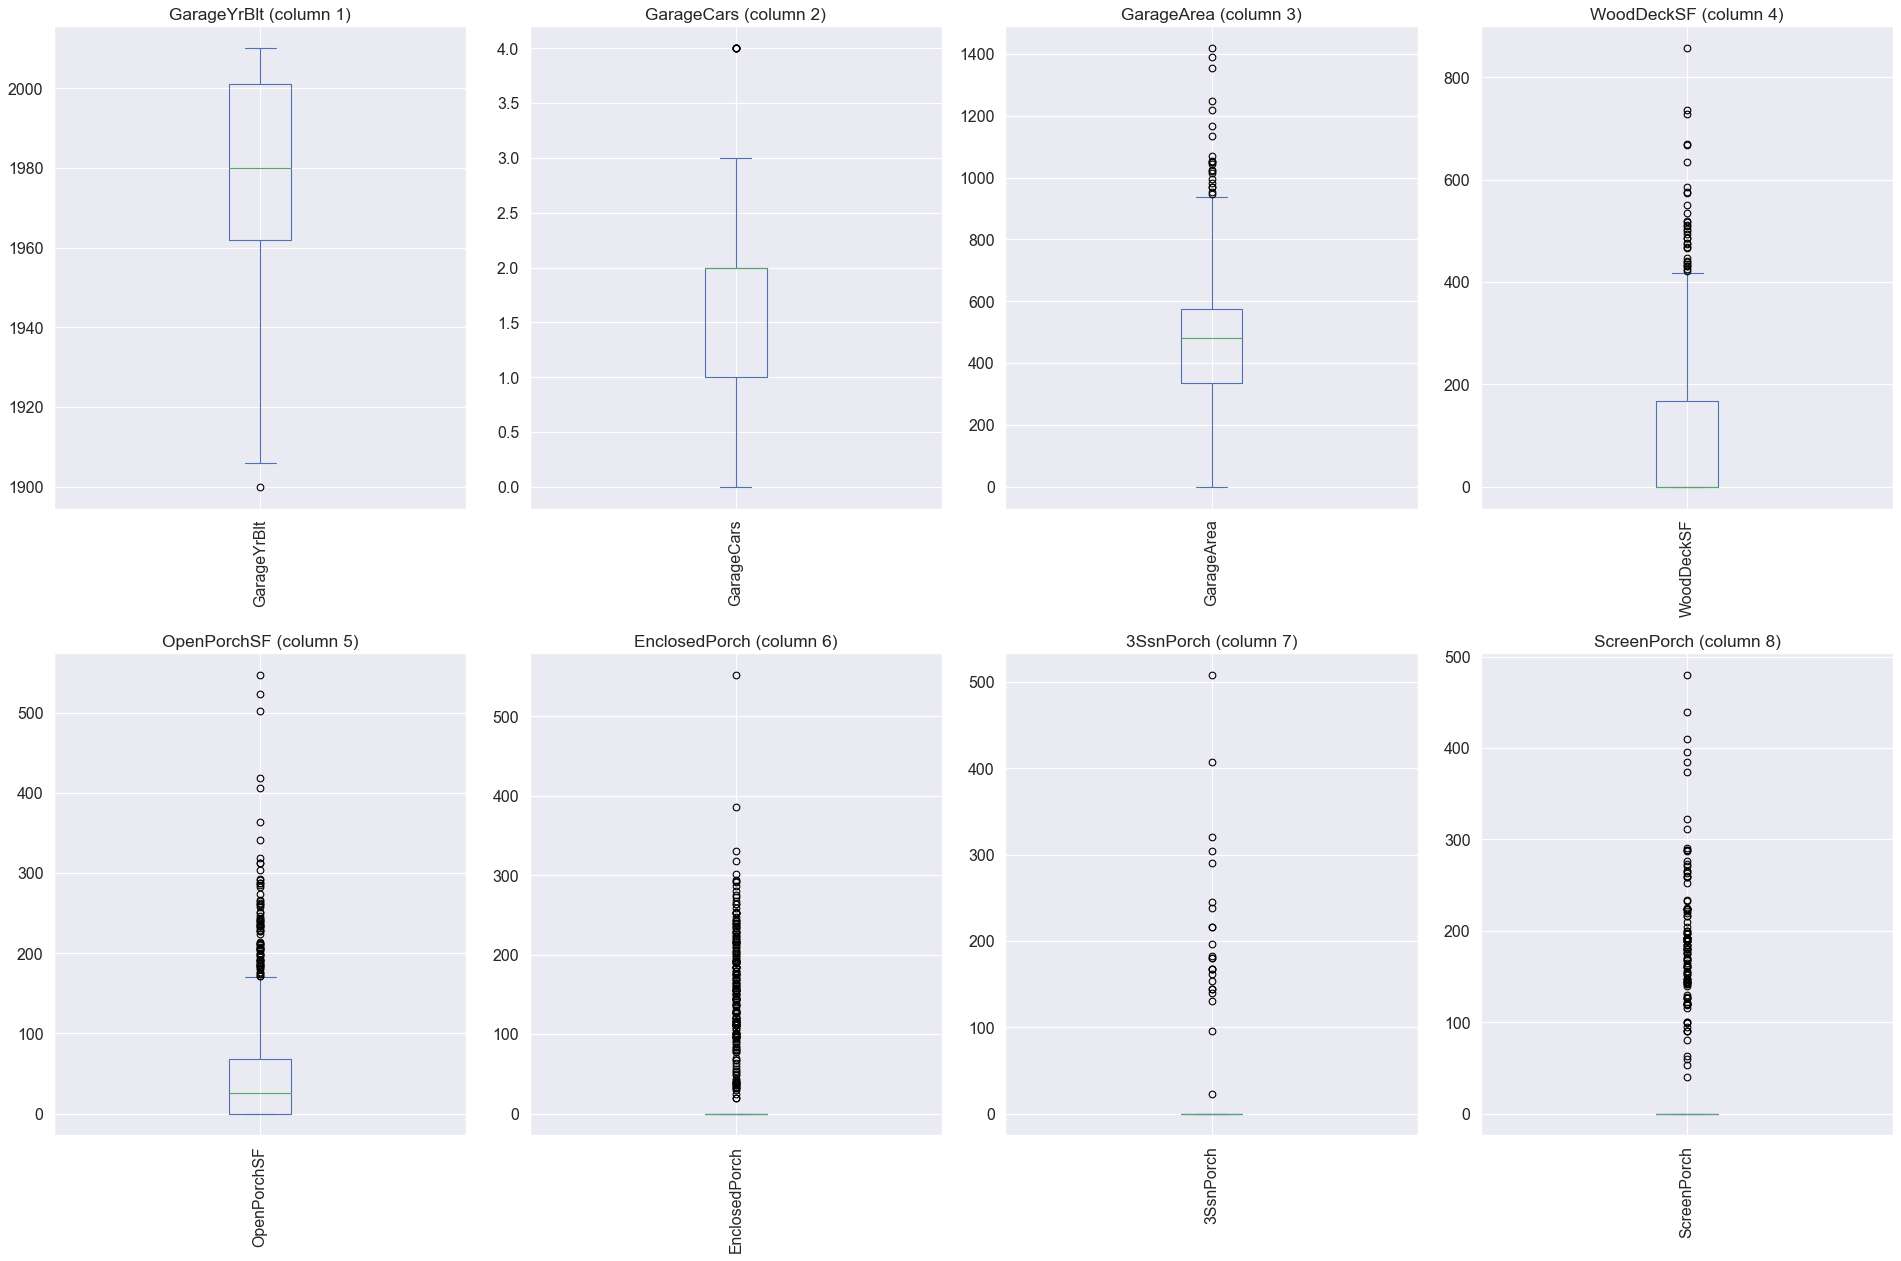


Unique values
GarageYrBlt : 97
GarageCars : 5
GarageArea : 441
WoodDeckSF : 274
OpenPorchSF : 202
EnclosedPorch : 120
3SsnPorch : 20
ScreenPorch : 76


In [23]:
eda(24, 32)

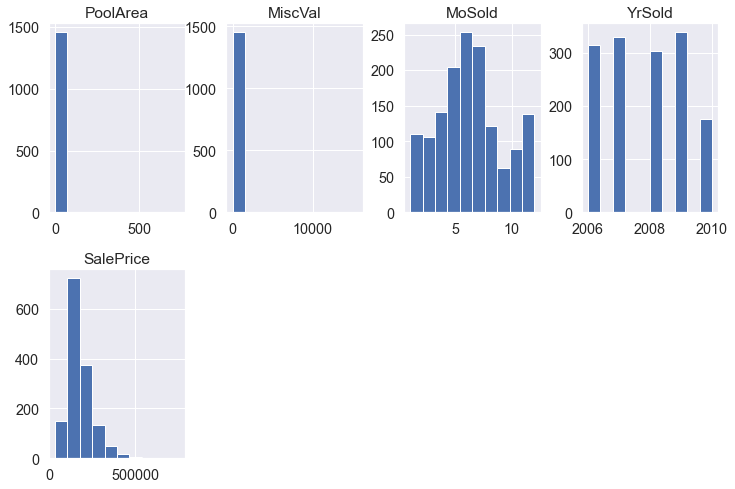

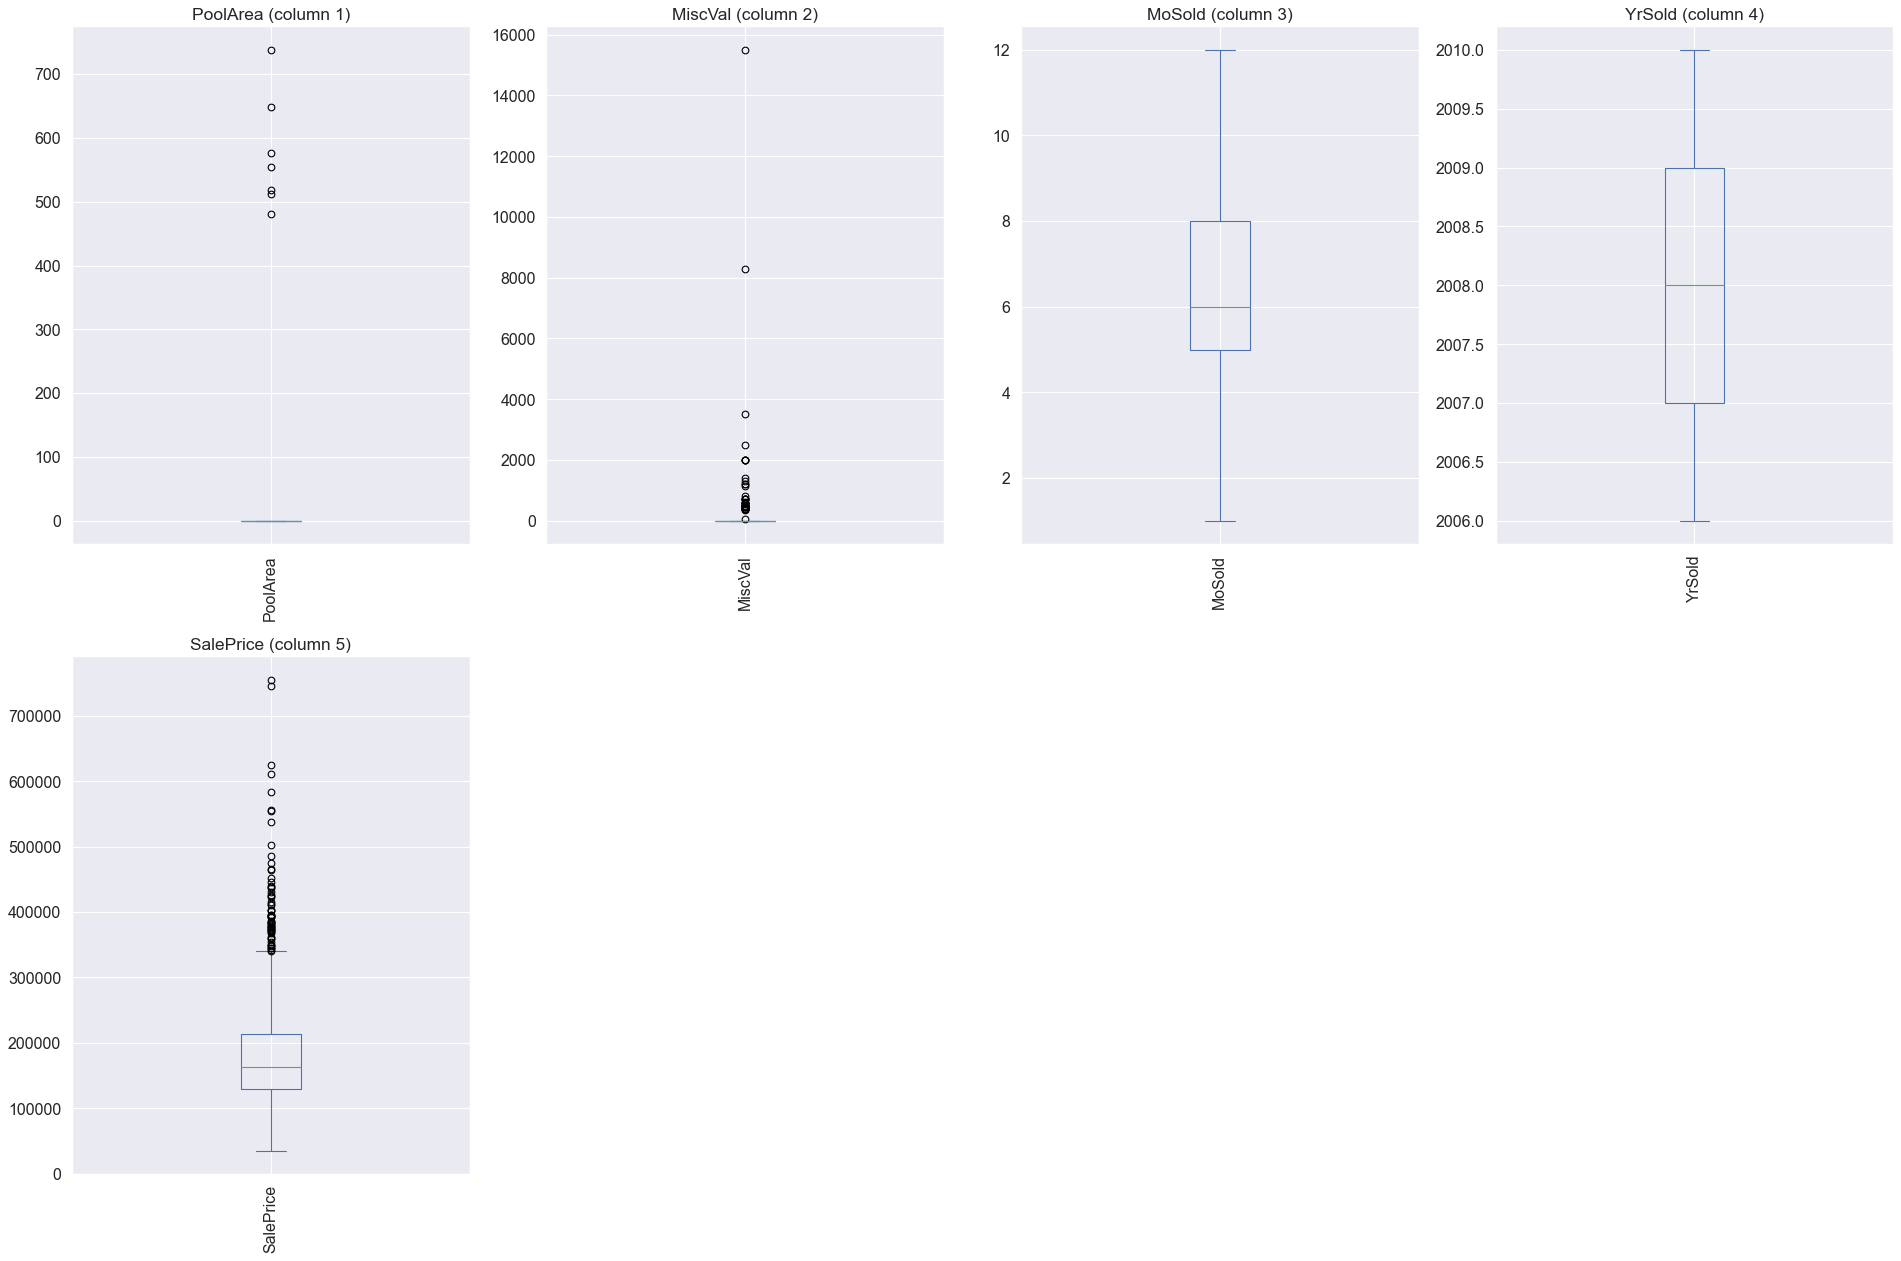


Unique values
PoolArea : 8
MiscVal : 21
MoSold : 12
YrSold : 5
SalePrice : 663


In [24]:
eda(32, 37)

Categorical features

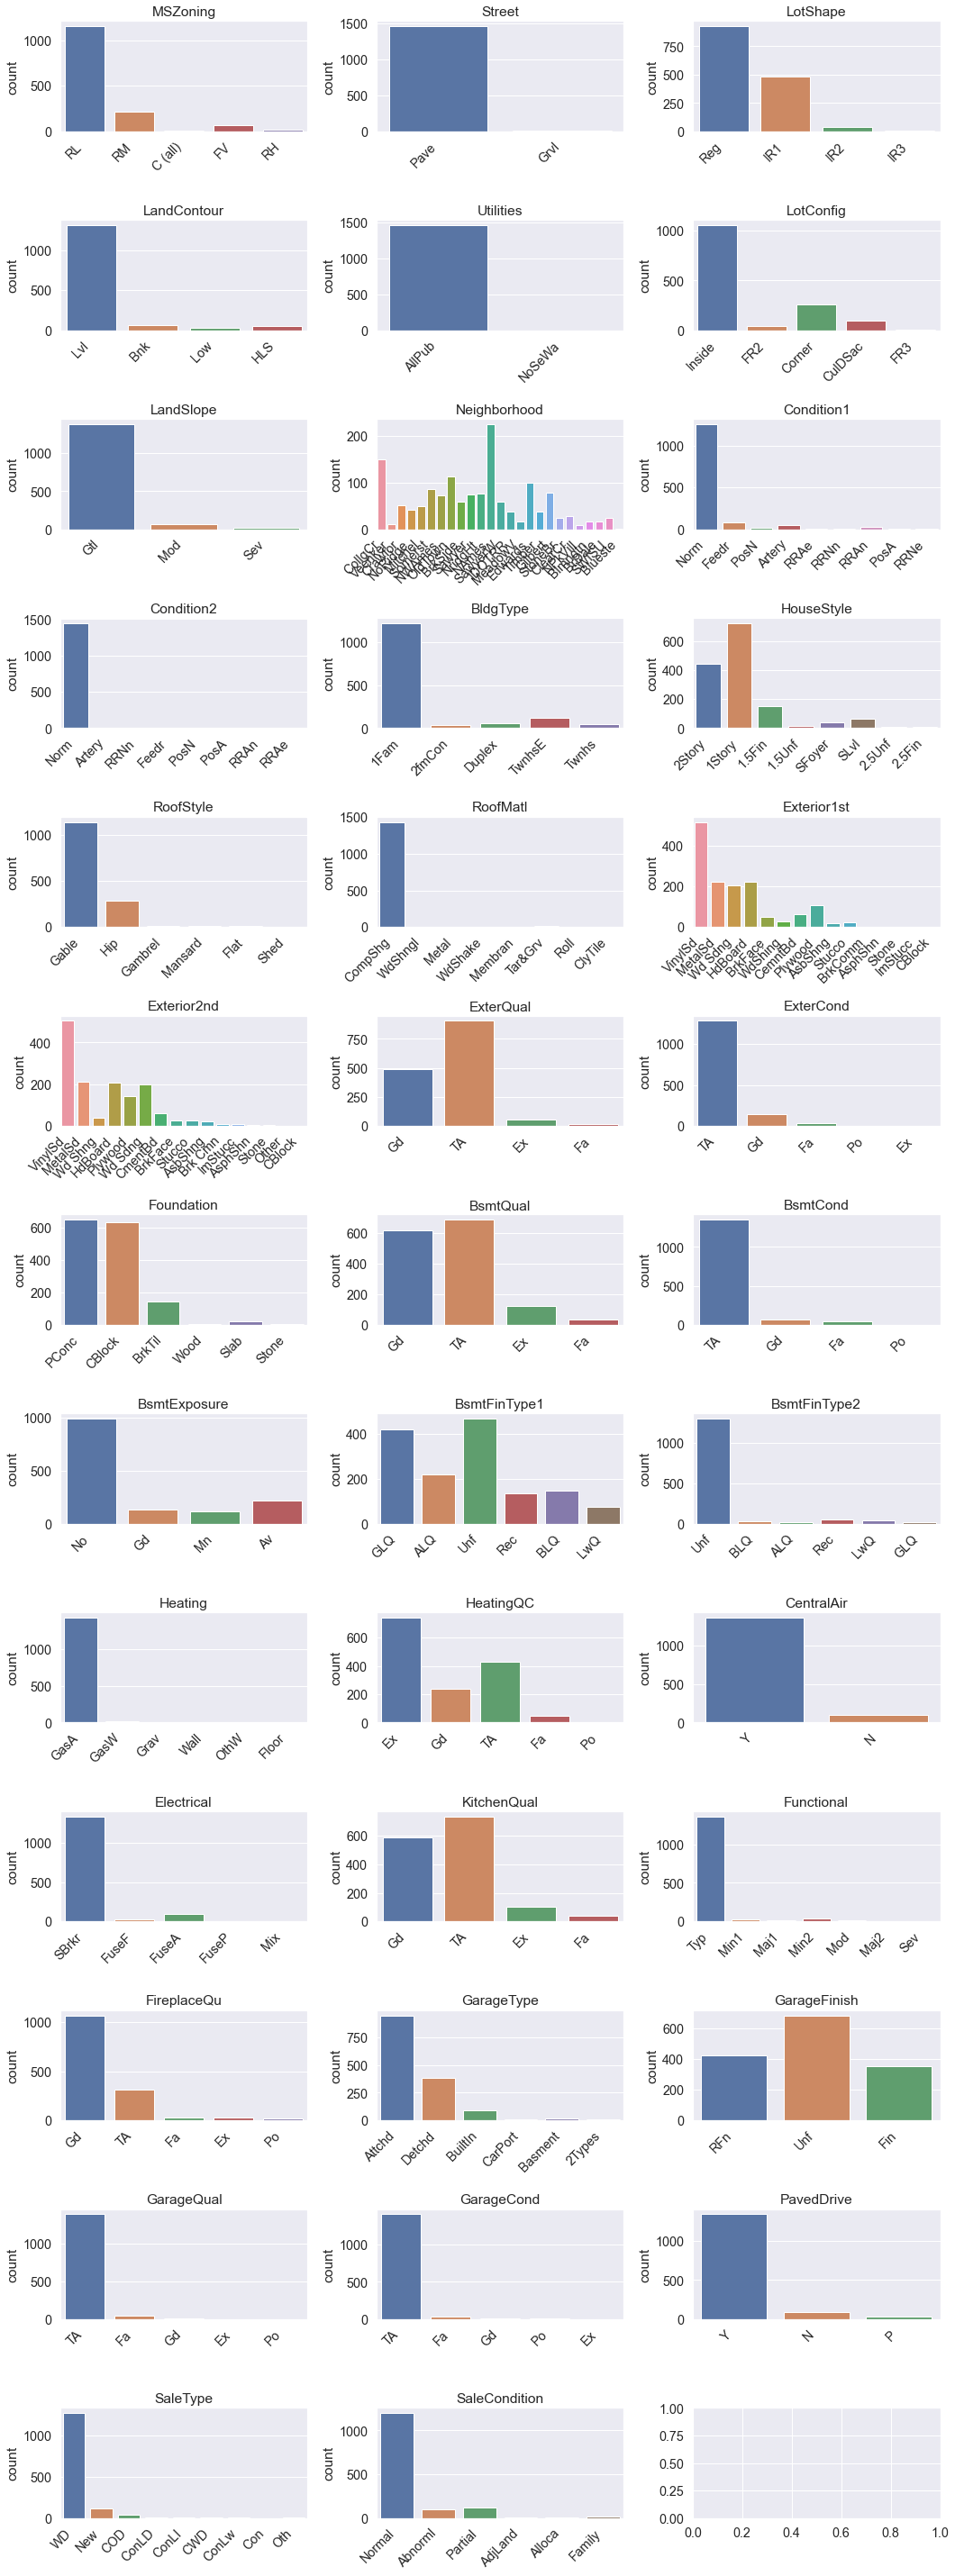

In [25]:
fig, axs = plt.subplots(13, 3, figsize=(15, 40))

for i, feature in enumerate(cat_cols):
    ax = axs[i // 3, i % 3]
    sns.countplot(x=feature, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(feature)

plt.tight_layout()
plt.show()

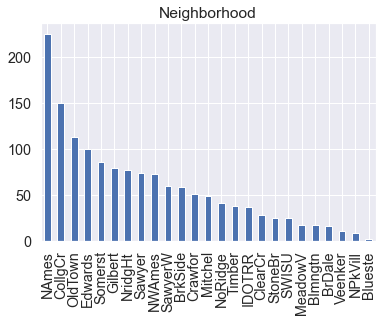

In [27]:
cat_df['Neighborhood'].value_counts().plot(kind='bar')
plt.title('Neighborhood')
plt.show()

In [28]:
cat_df.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

---
## Hypothesis Tests

First part: **distribution tests**

### Test 1
What is the distribution of GarageArea feature?

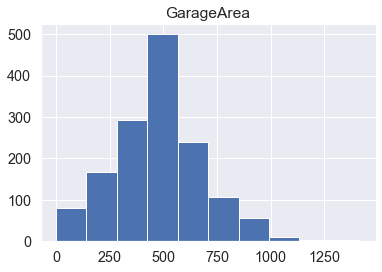

In [29]:
data['GarageArea'].hist()
plt.title('GarageArea')
plt.show()

Normality test
* H0: the sample has a normal distribution
* HA: the sample does not have a normal distribution

We use Shapiro-Wilk test for normality

In [30]:
stat, p = stats.shapiro(data['GarageArea'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=0.975, p=0.975


We cannot reject null hypothesis so the sample may have a normal distribution

### Test 2
Can we say that FullBath feature has a binomial distribution?

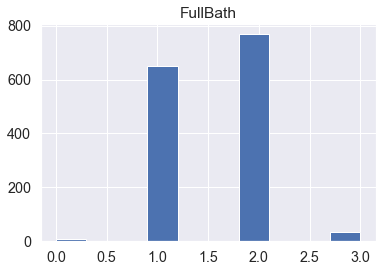

In [31]:
data['FullBath'].hist()
plt.title('FullBath')
plt.show()

Binomial distribution test
* H0: the sample has a binomial distribution
* HA: the sample does not have a binomial distribution

We use chisquare test

In [306]:
stat, p = stats.chisquare(data['FullBath'].value_counts())
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=1316.696, p=1316.696


We cannot reject null hypothesis so the sample may have a binomial distribution

Second part: **correlation tests**

### Test 3
How do GarageArea and GarageCars relate to each other?

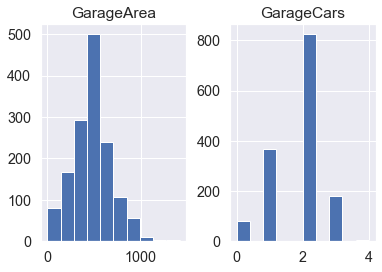

In [294]:
data[['GarageArea', 'GarageCars']].hist()
plt.show()

Correlation test
* H0: the samples are correlated
* HA: the samples do not have any correlation

We use pearson method

In [307]:
stat, p = stats.pearsonr(data['GarageArea'], data['GarageCars'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=0.882, p=0.882


We cannot reject null hypothesis so the samples may have correlation

### Test 4
What is the effect of first floor (1stFlrSF) and second floor (2ndFlrSF) on sale price?

What is different between their effect?

At first let's discover if there is any correlation between these features and sale price

In [311]:
stat, p = stats.pearsonr(data['SalePrice'], data['1stFlrSF'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=0.606, p=0.606


In [312]:
stat, p = stats.pearsonr(data['SalePrice'], data['2ndFlrSF'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=0.319, p=0.319


These two features have correlation with sale price **but 1stFlrSF has more correlation**

### Test 5
Is it possible to drop MSSubClass in a **Linear Regression** task?

What else can we drop?

In [316]:
stat, p = stats.pearsonr(data['SalePrice'], data['MSSubClass'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=-0.084, p=-0.084


They have no correlation so we can drop it. We can drop the following features in a linear regression task.

In [319]:
corrs = data.corr()['SalePrice']
corrs[corrs < 0.05]

MSSubClass      -0.084284
OverallCond     -0.077856
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
BsmtHalfBath    -0.016844
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
3SsnPorch        0.044584
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

### Test 6
Which feature is the most effective?

In [324]:
corrs.sort_values(ascending=False)[0:3]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
Name: SalePrice, dtype: float64

OverallQual is the most effective feature. Then we have GrLivArea.

Third part: **parametric tests**

### Test 7
We had seen before in the table that 'OpenPorchSF' and 'BsmtFinSF2' have nearly equal means.

Are they really equal or is it just by chance?

In [328]:
data[['OpenPorchSF', 'BsmtFinSF2']].mean()

OpenPorchSF    46.660274
BsmtFinSF2     46.549315
dtype: float64

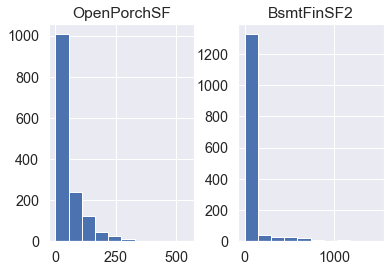

In [326]:
data[['OpenPorchSF', 'BsmtFinSF2']].hist()
plt.show()

Comparison test
* H0: the mean between two samples are equal (it is not by chance)
* HA: the mean between two samples are not equal (it is by chance)

We use t-test 

In [327]:
stat, p = stats.ttest_ind(data['OpenPorchSF'], data['BsmtFinSF2'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=0.024, p=0.024


So we can reject null hypothesis and it means it is just by chance.

Fourth part: **nonparametric tests**

### Test 8
Can we say the distribution of 'OpenPorchSF' and 'WoodDeckSF' is the same?


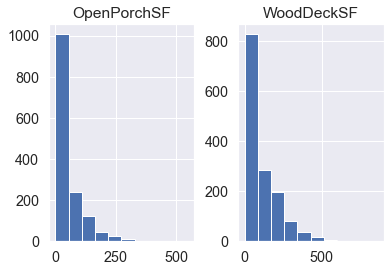

In [330]:
data[['OpenPorchSF', 'WoodDeckSF']].hist()
plt.show()

Distribution comparison
* H0: the distribution of two samples is the same
* HA: the distribution of two samples is not the same

We use Mann-Whitney U test.

In [336]:
stat, p = stats.mannwhitneyu(data['OpenPorchSF'], data['WoodDeckSF'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=948361.500, p=948361.500


So we cannot reject null hypothesis and their distribution can be the same.

And one last test for correlation between a categorical feature and the target.

### Test 9
What is the effect of GarageFinish on sale price?

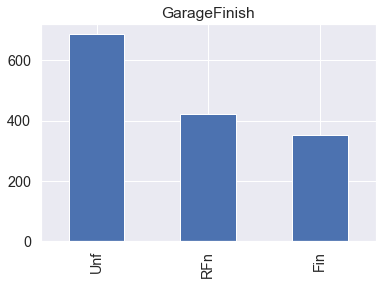

In [32]:
data['GarageFinish'].value_counts().plot(kind='bar')
plt.title('GarageFinish')
plt.show()

Correlation test
* H0: the samples are correlated
* HA: the samples do not have any correlation

We use f_oneway method in scipy.

In [343]:
category_grouped = data.groupby('GarageFinish')['SalePrice']
f_statistic, p_value = stats.f_oneway(*[group for name, group in category_grouped])
print('stat={0:.3f}, p={0:.3f}'.format(f_statistic, p_value))

stat=303.619, p=303.619


We cannot reject null hypothesis so the samples may have correlation